In [1]:
from astroquery.sdss import SDSS

In [2]:
from astropy import coordinates as coords

In [5]:
from astropy import units as u

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from astropy.io import fits
from astropy import table

In [3]:
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')

In [ ]:
358.26	36.40

In [40]:
ra = np.array([358.26])
dec = np.array([36.40])
coordinates = coords.SkyCoord(ra, dec, frame='icrs', unit='deg')

In [12]:
xid = SDSS.query_region(pos, radius=3*u.arcmin, spectro=True)

In [89]:
xid = SDSS.query_region(coordinates, radius=30*u.arcmin, spectro=True)

/astro/users/brycek/.conda/envs/py3-bryce/lib/python3.7/site-packages/astroquery/sdss/core.py:877: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [96]:
xid_pandas = xid.to_pandas().query('plate == 1880')

In [97]:
xid = table.Table().from_pandas(xid_pandas)

In [98]:
len(xid)

77

In [99]:
sp = SDSS.get_spectra(matches=xid)

In [100]:
len(sp)

77

In [59]:
sp[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fa9f9a8d4e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f9b42358>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f9bc24a8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8f0fd68>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8f25a20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8f3d470>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8ecfe48>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8ee6898>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8efe2e8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fa9f8e90cc0>]

In [60]:
sp[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4601873403.77 / 1st row - Number of seconds since Nov 17 1858  
RA      =            358.26367 / 1st row - Right ascension of telescope boresigh
DEC     =            36.401550 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:55:05.23'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                53262 / MJD of observation                             
MJDLIST = '53262   '        

In [73]:
sp[0][4].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   28 / length of dimension 1                          
NAXIS2  =                 2046 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TAI     =        4601872505.23 / 1st row - Number of seconds since Nov 17 1858  
RA      =            358.26367 / 1st row - Right ascension of telescope boresigh
DEC     =            36.401550 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '        

In [67]:
len(sp[0])

10

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

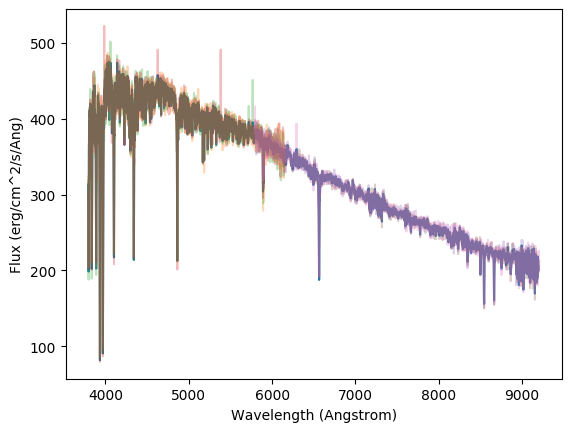

In [75]:
plt.plot(np.power(10, sp[0][1].data['loglam']), sp[0][1].data['flux'])
plt.plot(np.power(10, sp[0][4].data['loglam']), sp[0][4].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][5].data['loglam']), sp[0][5].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][6].data['loglam']), sp[0][6].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][7].data['loglam']), sp[0][7].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][8].data['loglam']), sp[0][8].data['flux'], alpha=0.3)
plt.plot(np.power(10, sp[0][9].data['loglam']), sp[0][9].data['flux'], alpha=0.3)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')

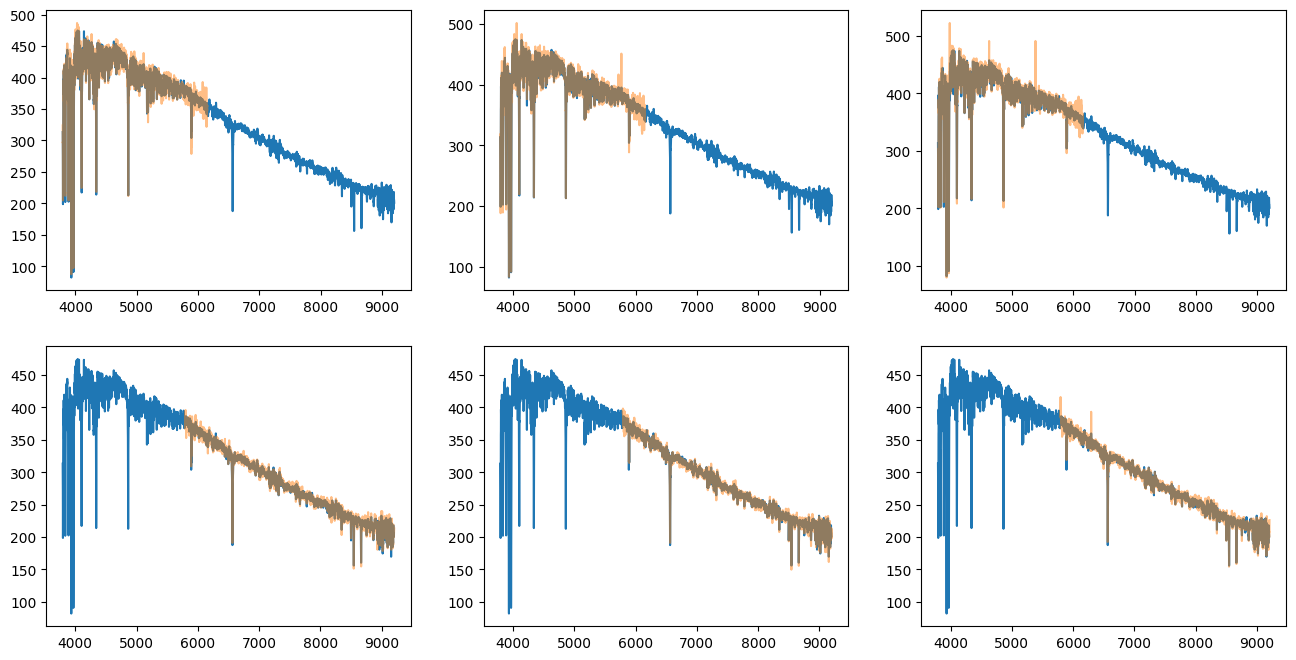

In [80]:
fig = plt.figure(figsize=(16, 8))
for i in range(6):
    fig.add_subplot(2,3,i+1)
    plt.plot(np.power(10, sp[0][1].data['loglam']), sp[0][1].data['flux'])
    plt.plot(np.power(10, sp[0][i+4].data['loglam']), sp[0][i+4].data['flux'], alpha=0.5)

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

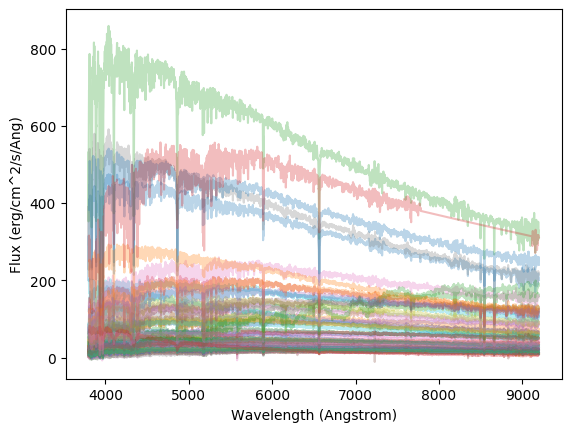

In [102]:
for i in range(len(xid)):
    plt.plot(np.power(10, sp[i][1].data['loglam']), sp[i][1].data['flux'], alpha=0.3)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')

Text(0, 0.5, 'Flux (erg/cm^2/s/Ang)')

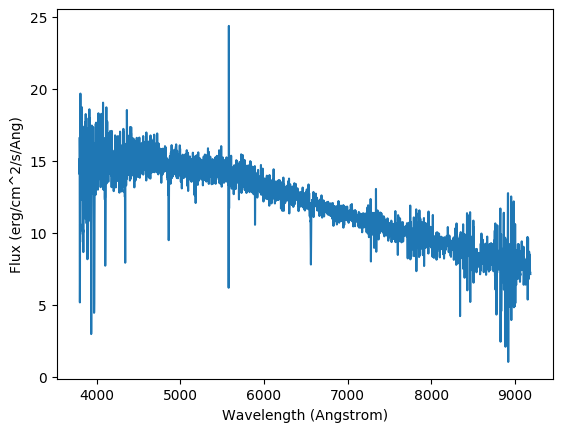

In [55]:
plt.plot(np.power(10, sp[4][1].data['loglam']), sp[4][1].data['flux'])
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm^2/s/Ang)')